In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('sentiment140_vader4_sinlematizar.csv')

In [3]:
df

,polarity,id,date,query,user,text,vader_polarity,preprocesado,word_count,preprocesado_constopwords,label,preprocesado_sinlematizar
0,negative,2184288131,Mon Jun 15 15:41:28 PDT 2009,NO_QUERY,Zelus,I want my e-mail with my tracking info for my ...,0.0772,want email track info new iphone,12,i want my email with my track info for my new ...,0,i want my email with my tracking info for my n...
1,negative,1834602716,Mon May 18 03:33:33 PDT 2009,NO_QUERY,S810uk,Is not happy with the weather I'm off to the ...,-0.4585,happy weather im museum later boy sock culture...,27,is not happy with the weather im off to the mu...,0,is not happy with the weather im off to the mu...
2,positive,1976167179,Sat May 30 16:44:04 PDT 2009,NO_QUERY,MicheleBlueston,@cindyscottday and forgot...you got kiddies ho...,0.5106,forgotyou get kiddy home still free agent take...,16,and forgotyou get kiddy home still free agent ...,1,and forgotyou got kiddies home still free agen...
3,positive,2047727017,Fri Jun 05 14:05:11 PDT 2009,NO_QUERY,adrian_x,@iota @brandie will ALWAYS be number two in MY...,0.0772,always number two book,8,will always be number two in m book,1,will always be number two in m book
4,positive,2014391411,Wed Jun 03 01:22:32 PDT 2009,NO_QUERY,muchloveanna,"@cjmccoll no problem gosh, her work is amazing!",0.7469,problem josh work amaze,7,no problem josh her work be amaze,1,no problem josh her work is amazing
...,...,...,...,...,...,...,...,...,...,...,...,...
121099,negative,2175983387,Mon Jun 15 02:34:22 PDT 2009,NO_QUERY,zapakitul,Back from school! Two more weeks of school he...,-0.6467,back school two week school hate highschool,13,back from school two more week of school here ...,0,back from school two more weeks of school here...
121100,positive,2185123417,Mon Jun 15 16:55:17 PDT 2009,NO_QUERY,dreacham,@lauren_nichelle i'll be sure to let daddy kno...,0.7639,ill sure let daddy know hell really happy,11,ill be sure to let daddy know hell be really h...,1,ill be sure to let daddy know hell be really h...
121101,positive,1834315088,Mon May 18 02:27:47 PDT 2009,NO_QUERY,Cherry_Gryffon,@erniehalter YAYYY new country invasion XD *do...,0.6739,yyy new country invasion xd wi helmet,8,yyy new country invasion xd don wi helmet,1,yyy new country invasion xd dons wi helmet
121102,positive,1676509898,Fri May 01 22:15:41 PDT 2009,NO_QUERY,tessthetraveler,just came back from op shopping in wynnum ther...,0.6184,come back op shopping wynnum many 2nd hand sto...,24,just come back from op shopping in wynnum ther...,1,just came back from op shopping in wynnum ther...


In [5]:
df['word_count_sinl']=df['preprocesado_sinlematizar'].apply(lambda x: len (x.split()))

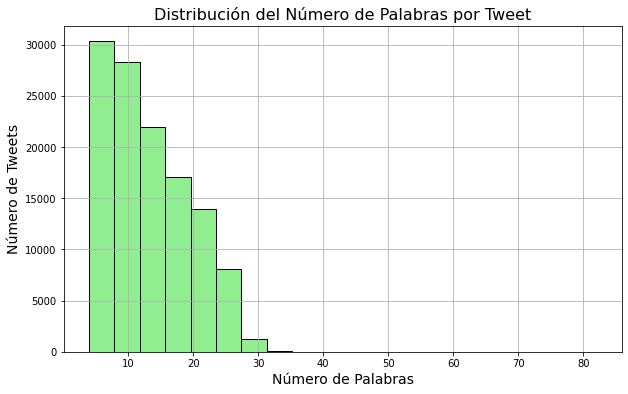

In [9]:
import matplotlib.pyplot as plt

# Crear un histograma del número de palabras por tweet
plt.figure(figsize=(10, 6))
plt.hist(df['word_count_sinl'], bins=20, edgecolor='black', color='lightgreen')
plt.title('Distribución del Número de Palabras por Tweet', fontsize=16)
plt.xlabel('Número de Palabras', fontsize=14)
plt.ylabel('Número de Tweets', fontsize=14)
plt.grid(True)
plt.show()

In [10]:
df['word_count_sinl'].value_counts()

6     7943
7     7904
8     7604
5     7519
9     7275
4     6983
10    6953
11    6522
12    6212
13    5558
14    5330
15    4884
16    4587
17    4316
19    4168
18    3969
20    3747
21    3651
22    3425
23    3112
24    2909
25    2362
26    1662
27    1145
28     672
29     371
30     163
31      79
32      30
33      10
34       9
43       3
38       3
42       2
35       2
37       2
49       2
53       2
44       1
54       1
47       1
82       1
39       1
46       1
36       1
61       1
62       1
66       1
57       1
76       1
48       1
72       1
Name: word_count_sinl, dtype: int64

In [13]:
import numpy as np
percentil_95 = np.percentile(df['word_count_sinl'], 95)
percentil_95

25.0

In [14]:
import fasttext
ft = fasttext.load_model('fasttext_twitter_raw.bin')

In [16]:
import pandas as pd
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import pandas as pd
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

label_mapping = {
    'negative': 0,
    'positive': 1,
    'neutral': 2
}



# Mapear las etiquetas a valores numéricos
df['label'] = df['polarity'].map(label_mapping)
# Etiquetas
y = df['label'] 

In [22]:
from sklearn.model_selection import train_test_split
# Dividir el conjunto de datos en entrenamiento y prueba
X = df['preprocesado_sinlematizar']
y = df['polarity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34, stratify=y)


In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Asumiendo que X_train contiene tus tweets como textos
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Convertir los textos a secuencias numéricas
sequences = tokenizer.texts_to_sequences(X_train)

# Definir el max_length basado en el percentil deseado (por ejemplo, 25 palabras)
max_length = 25

# Aplicar padding con la longitud máxima definida
X = pad_sequences(sequences, maxlen=max_length, padding='post')


In [24]:
import numpy as np
# Crear una matriz de embeddings
embedding_dim = 400
word_index = tokenizer.word_index
num_words = len(word_index) + 1

embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    try:
        embedding_vector = ft.get_word_vector(word)
        embedding_matrix[i] = embedding_vector
    except KeyError:
        continue

In [25]:
import numpy as np
# Guardar la matriz en un archivo binario
np.save('embeddings_matrix_vader_sinlematizar_def.npy', embedding_matrix)



In [39]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos original
X = df['preprocesado'].astype('str')
y = df['polarity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34, stratify=y)

# Eliminar nulos de X_train y X_test
X_train = X_train[X_train.notnull()]
y_train = y_train[X_train.index]  # Mantener alineación

X_test = X_test[X_test.notnull()]
y_test = y_test[X_test.index]  # Mantener alineación


# Definir el vectorizador TF-IDF y el modelo Naive Bayes
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

# Definir los parámetros a probar en Grid Search
param_grid = {
    'tfidf__max_features': [5000],         # Número máximo de características                 # Frecuencia máxima de documentos
    'nb__alpha': [0.5]                  # Parámetro de suavizado de Laplace
}

# Configurar GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Ajustar el modelo con el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Imprimir los resultados
print("Mejores parámetros encontrados:")
print(best_params)
print(f"Mejor precisión obtenida: {best_score:.2f}")

# Evaluar el mejor modelo en el conjunto de prueba
best_model = grid_search
grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Mostrar resultados de la evaluación en el conjunto de prueba
from sklearn.metrics import classification_report, accuracy_score

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Mejores parámetros encontrados:
{'nb__alpha': 0.5, 'tfidf__max_features': 5000}
Mejor precisión obtenida: 0.79
Accuracy en el conjunto de prueba: 79.24%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.79      0.75      0.77     11190
    positivo       0.79      0.83      0.81     13031

    accuracy                           0.79     24221
   macro avg       0.79      0.79      0.79     24221
weighted avg       0.79      0.79      0.79     24221



In [40]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos original
X = df['preprocesado'].astype('str')
y = df['polarity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34, stratify=y)

# Eliminar nulos de X_train y X_test
X_train = X_train[X_train.notnull()]
y_train = y_train[X_train.index]  # Mantener alineación

X_test = X_test[X_test.notnull()]
y_test = y_test[X_test.index]  # Mantener alineación

# Definir el vectorizador TF-IDF y el modelo Naive Bayes
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

# Definir los parámetros a probar en Grid Search
param_grid = {
    'tfidf__max_features': [5000],         # Número máximo de características                 # Frecuencia máxima de documentos
    'nb__alpha': [1.0]                  # Parámetro de suavizado de Laplace
}

# Configurar GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Ajustar el modelo con el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Imprimir los resultados
print("Mejores parámetros encontrados:")
print(best_params)
print(f"Mejor precisión obtenida: {best_score:.2f}")

# Evaluar el mejor modelo en el conjunto de prueba
best_model = grid_search
grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Mostrar resultados de la evaluación en el conjunto de prueba
from sklearn.metrics import classification_report, accuracy_score

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Mejores parámetros encontrados:
{'nb__alpha': 1.0, 'tfidf__max_features': 5000}
Mejor precisión obtenida: 0.79
Accuracy en el conjunto de prueba: 79.35%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.79      0.75      0.77     11190
    positivo       0.79      0.83      0.81     13031

    accuracy                           0.79     24221
   macro avg       0.79      0.79      0.79     24221
weighted avg       0.79      0.79      0.79     24221



In [41]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos original
X = df['preprocesado'].astype('str')
y = df['polarity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34, stratify=y)

# Eliminar nulos de X_train y X_test
X_train = X_train[X_train.notnull()]
y_train = y_train[X_train.index]  # Mantener alineación

X_test = X_test[X_test.notnull()]
y_test = y_test[X_test.index]  # Mantener alineación

# Definir el vectorizador TF-IDF y el modelo Naive Bayes
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

# Definir los parámetros a probar en Grid Search
param_grid = {
    'tfidf__max_features': [10000],         # Número máximo de características                 # Frecuencia máxima de documentos
    'nb__alpha': [0.5]                  # Parámetro de suavizado de Laplace
}

# Configurar GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Ajustar el modelo con el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Imprimir los resultados
print("Mejores parámetros encontrados:")
print(best_params)
print(f"Mejor precisión obtenida: {best_score:.2f}")

# Evaluar el mejor modelo en el conjunto de prueba
best_model = grid_search
grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Mostrar resultados de la evaluación en el conjunto de prueba
from sklearn.metrics import classification_report, accuracy_score

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Mejores parámetros encontrados:
{'nb__alpha': 0.5, 'tfidf__max_features': 10000}
Mejor precisión obtenida: 0.79
Accuracy en el conjunto de prueba: 79.18%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.79      0.75      0.77     11190
    positivo       0.79      0.83      0.81     13031

    accuracy                           0.79     24221
   macro avg       0.79      0.79      0.79     24221
weighted avg       0.79      0.79      0.79     24221



In [42]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos original
X = df['preprocesado'].astype('str')
y = df['polarity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34, stratify=y)

# Eliminar nulos de X_train y X_test
X_train = X_train[X_train.notnull()]
y_train = y_train[X_train.index]  # Mantener alineación

X_test = X_test[X_test.notnull()]
y_test = y_test[X_test.index]  # Mantener alineación

# Definir el vectorizador TF-IDF y el modelo Naive Bayes
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

# Definir los parámetros a probar en Grid Search
param_grid = {
    'tfidf__max_features': [10000],         # Número máximo de características                 # Frecuencia máxima de documentos
    'nb__alpha': [1.0]                  # Parámetro de suavizado de Laplace
}

# Configurar GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Ajustar el modelo con el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Imprimir los resultados
print("Mejores parámetros encontrados:")
print(best_params)
print(f"Mejor precisión obtenida: {best_score:.2f}")

# Evaluar el mejor modelo en el conjunto de prueba
best_model = grid_search
grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Mostrar resultados de la evaluación en el conjunto de prueba
from sklearn.metrics import classification_report, accuracy_score

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Mejores parámetros encontrados:
{'nb__alpha': 1.0, 'tfidf__max_features': 10000}
Mejor precisión obtenida: 0.79
Accuracy en el conjunto de prueba: 79.39%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.79      0.75      0.77     11190
    positivo       0.79      0.83      0.81     13031

    accuracy                           0.79     24221
   macro avg       0.79      0.79      0.79     24221
weighted avg       0.79      0.79      0.79     24221



In [43]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



# Definir el pipeline con TF-IDF y SVM
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),  # Vectorización TF-IDF
    ('svm', SVC(kernel='linear', C=1.0))  # SVM con kernel lineal
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy en el conjunto de prueba: 80.59%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.80      0.78      0.79     11190
    positivo       0.81      0.83      0.82     13031

    accuracy                           0.81     24221
   macro avg       0.81      0.80      0.80     24221
weighted avg       0.81      0.81      0.81     24221



In [44]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



# Definir el pipeline con TF-IDF y SVM
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),  # Vectorización TF-IDF
    ('svm', SVC(kernel='linear', C=10.0))  # SVM con kernel lineal
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy en el conjunto de prueba: 80.10%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.79      0.77      0.78     11190
    positivo       0.81      0.82      0.82     13031

    accuracy                           0.80     24221
   macro avg       0.80      0.80      0.80     24221
weighted avg       0.80      0.80      0.80     24221



In [45]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



# Definir el pipeline con TF-IDF y SVM
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000)),  # Vectorización TF-IDF
    ('svm', SVC(kernel='linear', C=1.0))  # SVM con kernel lineal
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy en el conjunto de prueba: 80.58%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.80      0.78      0.79     11190
    positivo       0.81      0.83      0.82     13031

    accuracy                           0.81     24221
   macro avg       0.80      0.80      0.80     24221
weighted avg       0.81      0.81      0.81     24221



In [46]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



# Definir el pipeline con TF-IDF y SVM
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000)),  # Vectorización TF-IDF
    ('svm', SVC(kernel='linear', C=10.0))  # SVM con kernel lineal
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy en el conjunto de prueba: 79.58%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.78      0.77      0.78     11190
    positivo       0.81      0.81      0.81     13031

    accuracy                           0.80     24221
   macro avg       0.79      0.79      0.79     24221
weighted avg       0.80      0.80      0.80     24221



In [47]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



# Definir el pipeline con TF-IDF y SVM
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),  # Vectorización TF-IDF
    ('svm', SVC(kernel='rbf', C=1.0))  # SVM con kernel lineal
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy en el conjunto de prueba: 81.12%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.81      0.78      0.79     11190
    positivo       0.81      0.84      0.83     13031

    accuracy                           0.81     24221
   macro avg       0.81      0.81      0.81     24221
weighted avg       0.81      0.81      0.81     24221



In [48]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



# Definir el pipeline con TF-IDF y SVM
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000)),  # Vectorización TF-IDF
    ('svm', SVC(kernel='rbf', C=1.0))  # SVM con kernel lineal
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy en el conjunto de prueba: 81.30%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.81      0.78      0.79     11190
    positivo       0.82      0.84      0.83     13031

    accuracy                           0.81     24221
   macro avg       0.81      0.81      0.81     24221
weighted avg       0.81      0.81      0.81     24221



In [49]:
import time
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Definir el pipeline con TF-IDF y SVM
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000)),  # Vectorización TF-IDF
    ('svm', SVC(kernel='rbf', C=1.0))  # SVM con kernel RBF
])

# Medir tiempo de entrenamiento
start_time = time.time()
pipeline.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

# Medir tiempo de predicción
start_time = time.time()
y_pred = pipeline.predict(X_test)
end_time = time.time()
prediction_time = end_time - start_time

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

print(f"Tiempo de entrenamiento: {training_time:.2f} segundos")
print(f"Tiempo de predicción: {prediction_time:.2f} segundos")


Accuracy en el conjunto de prueba: 81.30%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.81      0.78      0.79     11190
    positivo       0.82      0.84      0.83     13031

    accuracy                           0.81     24221
   macro avg       0.81      0.81      0.81     24221
weighted avg       0.81      0.81      0.81     24221

Tiempo de entrenamiento: 2467.68 segundos
Tiempo de predicción: 208.45 segundos


In [4]:
from sklearn.model_selection import train_test_split


In [5]:
X = df['preprocesado'].astype('str')
y = df['polarity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34, stratify=y)

X_train = X_train[X_train.notnull()]
y_train = y_train[X_train.index]  # Mantener alineación

X_test = X_test[X_test.notnull()]
y_test = y_test[X_test.index]  # Mantener alineación

In [ ]:
import time
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Definir el pipeline con TF-IDF y SVM
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000)),  # Vectorización TF-IDF
    ('svm', SVC(kernel='rbf', C=1.0))  # SVM con kernel RBF
])

# Medir tiempo de entrenamiento
start_time = time.time()
pipeline.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

# Medir tiempo de predicción
start_time = time.time()
y_pred = pipeline.predict(X_test)
end_time = time.time()
prediction_time = end_time - start_time

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

print(f"Tiempo de entrenamiento: {training_time:.2f} segundos")
print(f"Tiempo de predicción: {prediction_time:.2f} segundos")


In [6]:
import time
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Definir el pipeline con TF-IDF y SVM
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000)),  # Vectorización TF-IDF
    ('svm', SVC(kernel='rbf', C=10.0))  # SVM con kernel RBF
])

# Medir tiempo de entrenamiento
start_time = time.time()
pipeline.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

# Medir tiempo de predicción
start_time = time.time()
y_pred = pipeline.predict(X_test)
end_time = time.time()
prediction_time = end_time - start_time

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

print(f"Tiempo de entrenamiento: {training_time:.2f} segundos")
print(f"Tiempo de predicción: {prediction_time:.2f} segundos")


Accuracy en el conjunto de prueba: 80.66%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.80      0.78      0.79     11190
    positivo       0.81      0.83      0.82     13031

    accuracy                           0.81     24221
   macro avg       0.81      0.80      0.81     24221
weighted avg       0.81      0.81      0.81     24221

Tiempo de entrenamiento: 3160.94 segundos
Tiempo de predicción: 108.90 segundos


In [7]:
import time
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Definir el pipeline con TF-IDF y SVM
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),  # Vectorización TF-IDF
    ('svm', SVC(kernel='rbf', C=10.0))  # SVM con kernel RBF
])

# Medir tiempo de entrenamiento
start_time = time.time()
pipeline.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

# Medir tiempo de predicción
start_time = time.time()
y_pred = pipeline.predict(X_test)
end_time = time.time()
prediction_time = end_time - start_time

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

print(f"Tiempo de entrenamiento: {training_time:.2f} segundos")
print(f"Tiempo de predicción: {prediction_time:.2f} segundos")

Accuracy en el conjunto de prueba: 80.32%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.80      0.77      0.78     11190
    positivo       0.81      0.83      0.82     13031

    accuracy                           0.80     24221
   macro avg       0.80      0.80      0.80     24221
weighted avg       0.80      0.80      0.80     24221

Tiempo de entrenamiento: 2474.28 segundos
Tiempo de predicción: 103.95 segundos


In [50]:
df

,polarity,id,date,query,user,text,vader_polarity,preprocesado,word_count,preprocesado_constopwords,label,preprocesado_sinlematizar,word_count_sinl
0,negative,2184288131,Mon Jun 15 15:41:28 PDT 2009,NO_QUERY,Zelus,I want my e-mail with my tracking info for my ...,0.0772,want email track info new iphone,12,i want my email with my track info for my new ...,0,i want my email with my tracking info for my n...,12
1,negative,1834602716,Mon May 18 03:33:33 PDT 2009,NO_QUERY,S810uk,Is not happy with the weather I'm off to the ...,-0.4585,happy weather im museum later boy sock culture...,27,is not happy with the weather im off to the mu...,0,is not happy with the weather im off to the mu...,27
2,positive,1976167179,Sat May 30 16:44:04 PDT 2009,NO_QUERY,MicheleBlueston,@cindyscottday and forgot...you got kiddies ho...,0.5106,forgotyou get kiddy home still free agent take...,16,and forgotyou get kiddy home still free agent ...,1,and forgotyou got kiddies home still free agen...,16
3,positive,2047727017,Fri Jun 05 14:05:11 PDT 2009,NO_QUERY,adrian_x,@iota @brandie will ALWAYS be number two in MY...,0.0772,always number two book,8,will always be number two in m book,1,will always be number two in m book,8
4,positive,2014391411,Wed Jun 03 01:22:32 PDT 2009,NO_QUERY,muchloveanna,"@cjmccoll no problem gosh, her work is amazing!",0.7469,problem josh work amaze,7,no problem josh her work be amaze,1,no problem josh her work is amazing,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121099,negative,2175983387,Mon Jun 15 02:34:22 PDT 2009,NO_QUERY,zapakitul,Back from school! Two more weeks of school he...,-0.6467,back school two week school hate highschool,13,back from school two more week of school here ...,0,back from school two more weeks of school here...,13
121100,positive,2185123417,Mon Jun 15 16:55:17 PDT 2009,NO_QUERY,dreacham,@lauren_nichelle i'll be sure to let daddy kno...,0.7639,ill sure let daddy know hell really happy,11,ill be sure to let daddy know hell be really h...,1,ill be sure to let daddy know hell be really h...,11
121101,positive,1834315088,Mon May 18 02:27:47 PDT 2009,NO_QUERY,Cherry_Gryffon,@erniehalter YAYYY new country invasion XD *do...,0.6739,yyy new country invasion xd wi helmet,8,yyy new country invasion xd don wi helmet,1,yyy new country invasion xd dons wi helmet,8
121102,positive,1676509898,Fri May 01 22:15:41 PDT 2009,NO_QUERY,tessthetraveler,just came back from op shopping in wynnum ther...,0.6184,come back op shopping wynnum many 2nd hand sto...,24,just come back from op shopping in wynnum ther...,1,just came back from op shopping in wynnum ther...,24


Con stopwords

In [5]:
from sklearn.model_selection import train_test_split
# Dividir el conjunto de datos original
X = df['preprocesado_constopwords'].astype('str')
y = df['polarity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34, stratify=y)

# Eliminar nulos de X_train y X_test
X_train = X_train[X_train.notnull()]
y_train = y_train[X_train.index]  # Mantener alineación

X_test = X_test[X_test.notnull()]
y_test = y_test[X_test.index]  # Mantener alineación

In [54]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Definir el vectorizador TF-IDF y el modelo Naive Bayes
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

# Definir los parámetros a probar en Grid Search
param_grid = {
    'tfidf__max_features': [5000],         # Número máximo de características                 # Frecuencia máxima de documentos
    'nb__alpha': [0.5]                  # Parámetro de suavizado de Laplace
}

# Configurar GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Ajustar el modelo con el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Imprimir los resultados
print("Mejores parámetros encontrados:")
print(best_params)
print(f"Mejor precisión obtenida: {best_score:.2f}")

# Evaluar el mejor modelo en el conjunto de prueba
best_model = grid_search
grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Mostrar resultados de la evaluación en el conjunto de prueba
from sklearn.metrics import classification_report, accuracy_score

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Mejores parámetros encontrados:
{'nb__alpha': 0.5, 'tfidf__max_features': 5000}
Mejor precisión obtenida: 0.80
Accuracy en el conjunto de prueba: 80.38%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.81      0.76      0.78     11190
    positivo       0.80      0.84      0.82     13031

    accuracy                           0.80     24221
   macro avg       0.80      0.80      0.80     24221
weighted avg       0.80      0.80      0.80     24221



In [55]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Definir el vectorizador TF-IDF y el modelo Naive Bayes
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

# Definir los parámetros a probar en Grid Search
param_grid = {
    'tfidf__max_features': [10000],         # Número máximo de características                 # Frecuencia máxima de documentos
    'nb__alpha': [0.5]                  # Parámetro de suavizado de Laplace
}

# Configurar GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Ajustar el modelo con el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Imprimir los resultados
print("Mejores parámetros encontrados:")
print(best_params)
print(f"Mejor precisión obtenida: {best_score:.2f}")

# Evaluar el mejor modelo en el conjunto de prueba
best_model = grid_search
grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Mostrar resultados de la evaluación en el conjunto de prueba
from sklearn.metrics import classification_report, accuracy_score

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Mejores parámetros encontrados:
{'nb__alpha': 0.5, 'tfidf__max_features': 10000}
Mejor precisión obtenida: 0.80
Accuracy en el conjunto de prueba: 80.16%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.80      0.76      0.78     11190
    positivo       0.80      0.84      0.82     13031

    accuracy                           0.80     24221
   macro avg       0.80      0.80      0.80     24221
weighted avg       0.80      0.80      0.80     24221



In [56]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Definir el vectorizador TF-IDF y el modelo Naive Bayes
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

# Definir los parámetros a probar en Grid Search
param_grid = {
    'tfidf__max_features': [5000],         # Número máximo de características                 # Frecuencia máxima de documentos
    'nb__alpha': [1.0]                  # Parámetro de suavizado de Laplace
}

# Configurar GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Ajustar el modelo con el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Imprimir los resultados
print("Mejores parámetros encontrados:")
print(best_params)
print(f"Mejor precisión obtenida: {best_score:.2f}")

# Evaluar el mejor modelo en el conjunto de prueba
best_model = grid_search
grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Mostrar resultados de la evaluación en el conjunto de prueba
from sklearn.metrics import classification_report, accuracy_score

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Mejores parámetros encontrados:
{'nb__alpha': 1.0, 'tfidf__max_features': 5000}
Mejor precisión obtenida: 0.80
Accuracy en el conjunto de prueba: 80.46%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.81      0.76      0.78     11190
    positivo       0.80      0.85      0.82     13031

    accuracy                           0.80     24221
   macro avg       0.80      0.80      0.80     24221
weighted avg       0.80      0.80      0.80     24221



In [57]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Definir el vectorizador TF-IDF y el modelo Naive Bayes
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

# Definir los parámetros a probar en Grid Search
param_grid = {
    'tfidf__max_features': [10000],         # Número máximo de características                 # Frecuencia máxima de documentos
    'nb__alpha': [1.0]                  # Parámetro de suavizado de Laplace
}

# Configurar GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Ajustar el modelo con el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Imprimir los resultados
print("Mejores parámetros encontrados:")
print(best_params)
print(f"Mejor precisión obtenida: {best_score:.2f}")

# Evaluar el mejor modelo en el conjunto de prueba
best_model = grid_search
grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Mostrar resultados de la evaluación en el conjunto de prueba
from sklearn.metrics import classification_report, accuracy_score

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Mejores parámetros encontrados:
{'nb__alpha': 1.0, 'tfidf__max_features': 10000}
Mejor precisión obtenida: 0.80
Accuracy en el conjunto de prueba: 80.45%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.81      0.76      0.78     11190
    positivo       0.80      0.85      0.82     13031

    accuracy                           0.80     24221
   macro avg       0.80      0.80      0.80     24221
weighted avg       0.80      0.80      0.80     24221



In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



# Definir el pipeline con TF-IDF y SVM
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),  # Vectorización TF-IDF
    ('svm', SVC(kernel='linear', C=1.0))  # SVM con kernel lineal
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy en el conjunto de prueba: 82.30%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.81      0.80      0.81     11190
    positivo       0.83      0.84      0.84     13031

    accuracy                           0.82     24221
   macro avg       0.82      0.82      0.82     24221
weighted avg       0.82      0.82      0.82     24221



In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



# Definir el pipeline con TF-IDF y SVM
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),  # Vectorización TF-IDF
    ('svm', SVC(kernel='linear', C=10.0))  # SVM con kernel lineal
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy en el conjunto de prueba: 81.89%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.81      0.80      0.80     11190
    positivo       0.83      0.84      0.83     13031

    accuracy                           0.82     24221
   macro avg       0.82      0.82      0.82     24221
weighted avg       0.82      0.82      0.82     24221



In [60]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



# Definir el pipeline con TF-IDF y SVM
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000)),  # Vectorización TF-IDF
    ('svm', SVC(kernel='linear', C=1.0))  # SVM con kernel lineal
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy en el conjunto de prueba: 82.33%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.81      0.80      0.81     11190
    positivo       0.83      0.84      0.84     13031

    accuracy                           0.82     24221
   macro avg       0.82      0.82      0.82     24221
weighted avg       0.82      0.82      0.82     24221



In [61]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



# Definir el pipeline con TF-IDF y SVM
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000)),  # Vectorización TF-IDF
    ('svm', SVC(kernel='linear', C=10.0))  # SVM con kernel lineal
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy en el conjunto de prueba: 81.50%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.80      0.80      0.80     11190
    positivo       0.83      0.83      0.83     13031

    accuracy                           0.81     24221
   macro avg       0.81      0.81      0.81     24221
weighted avg       0.81      0.81      0.81     24221



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



# Definir el pipeline con TF-IDF y SVM
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),  # Vectorización TF-IDF
    ('svm', SVC(kernel='rbf', C=1.0))  # SVM con kernel lineal
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy en el conjunto de prueba: 83.44%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.83      0.81      0.82     11190
    positivo       0.84      0.85      0.85     13031

    accuracy                           0.83     24221
   macro avg       0.83      0.83      0.83     24221
weighted avg       0.83      0.83      0.83     24221



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



# Definir el pipeline con TF-IDF y SVM
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),  # Vectorización TF-IDF
    ('svm', SVC(kernel='rbf', C=10.0))  # SVM con kernel lineal
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy en el conjunto de prueba: 83.11%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.82      0.81      0.82     11190
    positivo       0.84      0.85      0.84     13031

    accuracy                           0.83     24221
   macro avg       0.83      0.83      0.83     24221
weighted avg       0.83      0.83      0.83     24221



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



# Definir el pipeline con TF-IDF y SVM
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000)),  # Vectorización TF-IDF
    ('svm', SVC(kernel='rbf', C=1.0))  # SVM con kernel lineal
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy en el conjunto de prueba: 83.47%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.83      0.81      0.82     11190
    positivo       0.84      0.85      0.85     13031

    accuracy                           0.83     24221
   macro avg       0.83      0.83      0.83     24221
weighted avg       0.83      0.83      0.83     24221



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



# Definir el pipeline con TF-IDF y SVM
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000)),  # Vectorización TF-IDF
    ('svm', SVC(kernel='rbf', C=10.0))  # SVM con kernel lineal
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy en el conjunto de prueba: 83.42%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.82      0.81      0.82     11190
    positivo       0.84      0.85      0.85     13031

    accuracy                           0.83     24221
   macro avg       0.83      0.83      0.83     24221
weighted avg       0.83      0.83      0.83     24221



In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



# Definir el pipeline con TF-IDF y SVM
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),  # Vectorización TF-IDF
    ('svm', SVC(kernel='rbf', C=10.0))  # SVM con kernel lineal
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy en el conjunto de prueba: 83.11%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.82      0.81      0.82     11190
    positivo       0.84      0.85      0.84     13031

    accuracy                           0.83     24221
   macro avg       0.83      0.83      0.83     24221
weighted avg       0.83      0.83      0.83     24221



In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



# Definir el pipeline con TF-IDF y SVM
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000)),  # Vectorización TF-IDF
    ('svm', SVC(kernel='rbf', C=10.0))  # SVM con kernel lineal
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy en el conjunto de prueba: 83.42%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.82      0.81      0.82     11190
    positivo       0.84      0.85      0.85     13031

    accuracy                           0.83     24221
   macro avg       0.83      0.83      0.83     24221
weighted avg       0.83      0.83      0.83     24221



In [6]:
import time
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Definir el pipeline con TF-IDF y SVM
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000)),  # Vectorización TF-IDF
    ('svm', SVC(kernel='rbf', C=1.0))  # SVM con kernel RBF
])

# Medir tiempo de entrenamiento
start_time = time.time()
pipeline.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

# Medir tiempo de predicción
start_time = time.time()
y_pred = pipeline.predict(X_test)
end_time = time.time()
prediction_time = end_time - start_time

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

print(f"Tiempo de entrenamiento: {training_time:.2f} segundos")
print(f"Tiempo de predicción: {prediction_time:.2f} segundos")


Accuracy en el conjunto de prueba: 83.47%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.83      0.81      0.82     11190
    positivo       0.84      0.85      0.85     13031

    accuracy                           0.83     24221
   macro avg       0.83      0.83      0.83     24221
weighted avg       0.83      0.83      0.83     24221

Tiempo de entrenamiento: 3421.77 segundos
Tiempo de predicción: 281.47 segundos


In [7]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['negativo', 'positivo'])

print(f"Accuracy en el conjunto de prueba: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)
print(f"Tiempo de entrenamiento: {training_time:.2f} segundos")
print(f"Tiempo de predicción: {prediction_time:.2f} segundos")

# Obtener probabilidades de predicción para la curva ROC
y_prob = pipeline.predict_proba(X_test)[:, 1]  # Obtener la probabilidad de la clase positiva

# Calcular ROC-AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['negativo', 'positivo'], yticklabels=['negativo', 'positivo'])
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.show()

Accuracy en el conjunto de prueba: 83.47%
Classification Report:
              precision    recall  f1-score   support

    negativo       0.83      0.81      0.82     11190
    positivo       0.84      0.85      0.85     13031

    accuracy                           0.83     24221
   macro avg       0.83      0.83      0.83     24221
weighted avg       0.83      0.83      0.83     24221

Tiempo de entrenamiento: 3421.77 segundos
Tiempo de predicción: 281.47 segundos


AttributeError: predict_proba is not available when  probability=False

In [21]:
import matplotlib
print(matplotlib.__version__)


3.9.2


In [20]:
!pip install --upgrade matplotlib


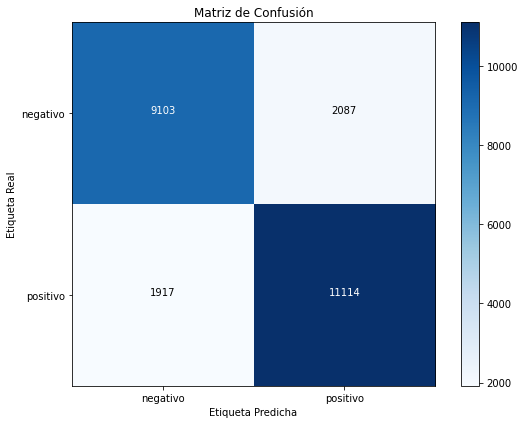

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Suponiendo que ya tienes `y_test` y `y_pred` definidos
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap='Blues')
plt.title('Matriz de Confusión')
plt.colorbar()
tick_marks = np.arange(len(['negativo', 'positivo']))
plt.xticks(tick_marks, ['negativo', 'positivo'])
plt.yticks(tick_marks, ['negativo', 'positivo'])

# Colocar las etiquetas de los recuentos
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):  # Iterar sobre las filas
    for j in range(conf_matrix.shape[1]):  # Iterar sobre las columnas
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.tight_layout()
plt.show()


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Obtener los resultados de predicción (asegúrate de haber ejecutado el modelo previamente)
# y_pred = pipeline.predict(X_test)

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)


# Obtener las puntuaciones de decisión para la curva ROC
y_scores = pipeline.decision_function(X_test)  # usar decision_function si SVM

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.grid()
plt.show()


ValueError: y_true takes value in {'negative', 'positive'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

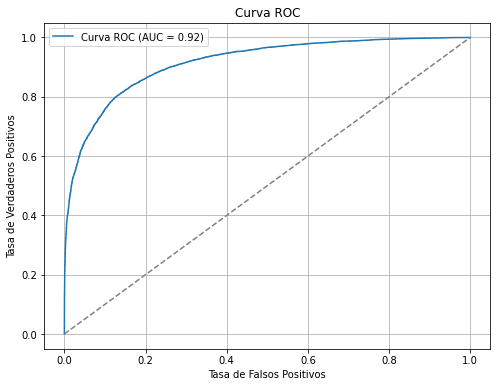

In [25]:
from sklearn.preprocessing import LabelEncoder

# Codificar las etiquetas
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)  # 'negative' se convertirá en 0 y 'positive' en 1
y_pred_encoded = label_encoder.transform(y_pred)  # Asegúrate de usar el mismo encoder para y_pred

# Obtener las puntuaciones de decisión
y_scores = pipeline.decision_function(X_test)

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test_encoded, y_scores)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.grid()
plt.show()
